In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


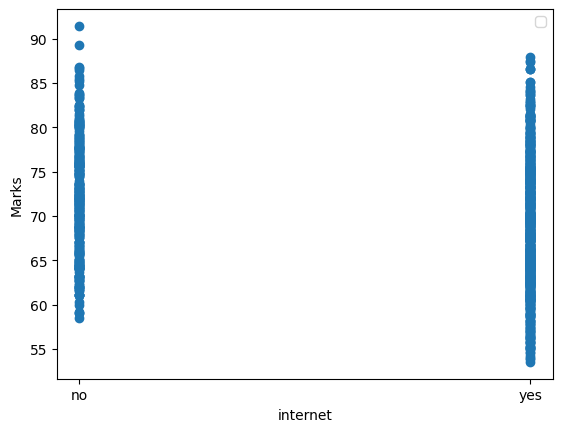

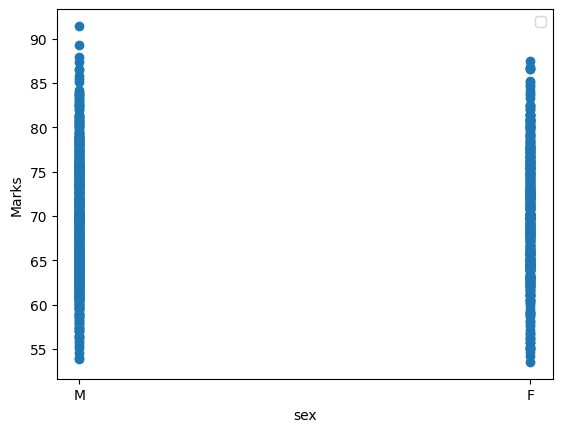

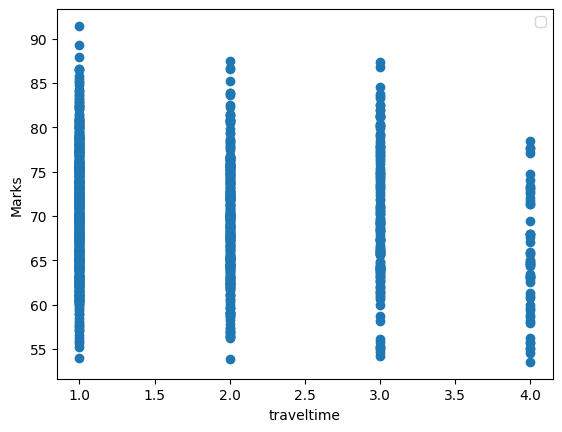

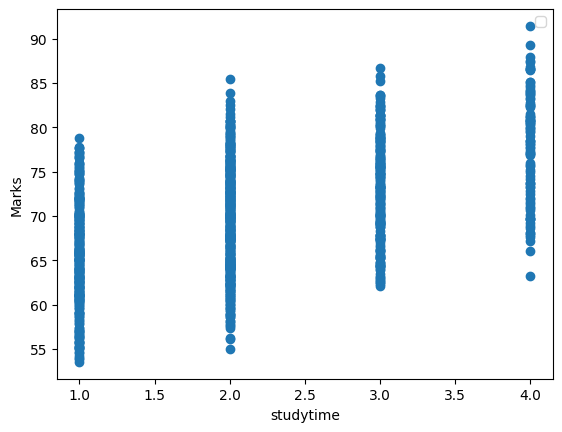

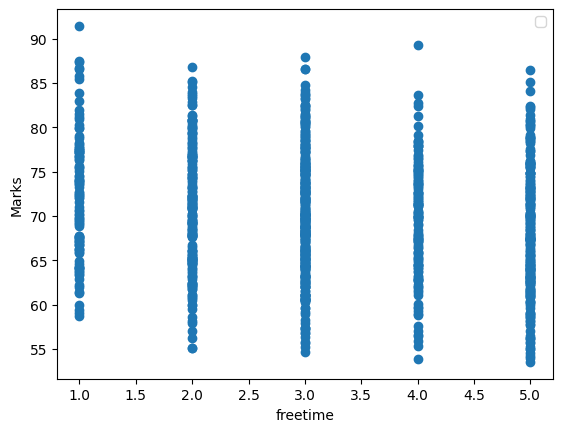

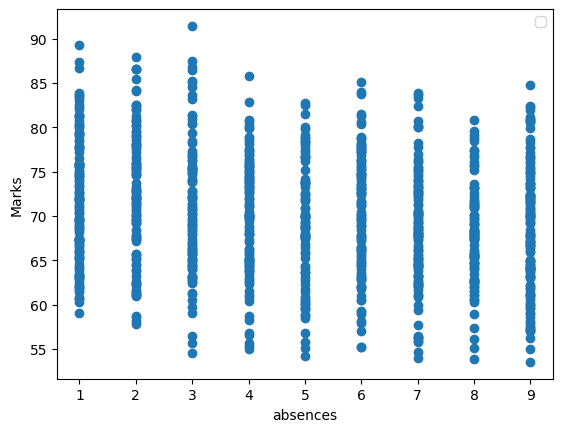

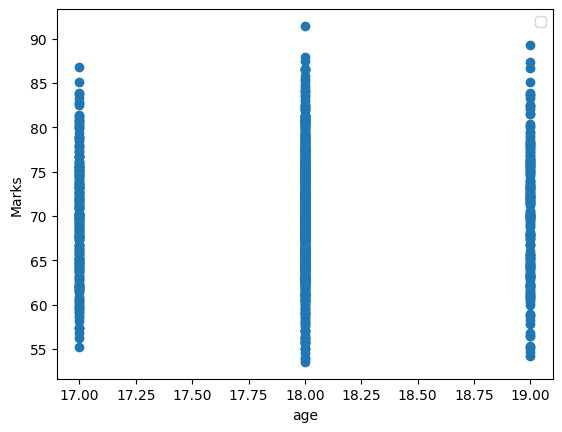

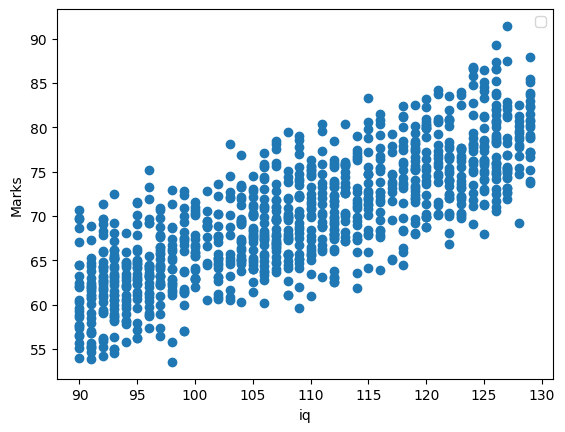

In [20]:
# Use the file namd 'training data' to train the model
from google.colab import drive
drive.mount('/content/drive')
file_path_1 = '/content/drive/My Drive/Training data.xlsx'
file_path_2 = '/content/drive/My Drive/Test data.xlsx'
data = pd.read_excel(file_path_1)


x_train = data.iloc[:, 0:8]
y_train = data.iloc[:, 8].values.reshape(-1, 1)

# Try plotting y_train with different features

plt.figure()
plt.plot(data['internet'], y_train, 'o')
plt.xlabel("internet")
plt.ylabel("Marks")
plt.legend()
plt.show()

plt.figure()
plt.plot(data['sex'], y_train, 'o')
plt.xlabel("sex")
plt.ylabel("Marks")
plt.legend()
plt.show()

plt.figure()
plt.plot(data['traveltime'], y_train, 'o')
plt.xlabel("traveltime")
plt.ylabel("Marks")
plt.legend()
plt.show()

plt.figure()
plt.plot(data['studytime'], y_train, 'o')
plt.xlabel("studytime")
plt.ylabel("Marks")
plt.legend()
plt.show()

plt.figure()
plt.plot(data['freetime'], y_train, 'o')
plt.xlabel("freetime")
plt.ylabel("Marks")
plt.legend()
plt.show()

plt.figure()
plt.plot(data['absences'], y_train, 'o')
plt.xlabel("absences")
plt.ylabel("Marks")
plt.legend()
plt.show()

plt.figure()
plt.plot(data['age'], y_train, 'o')
plt.xlabel("age")
plt.ylabel("Marks")
plt.legend()
plt.show()

plt.figure()
plt.plot(data['iq'], y_train, 'o')
plt.xlabel("iq")
plt.ylabel("Marks")
plt.legend()
plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  x_train = pd.DataFrame(x_train, columns=['internet', 'sex', 'traveltime', 'studytime', 'freetime', 'absences', 'age', 'iq'])
  x_train['internet'] =x_train['internet'].map({'yes': 1, 'no': 0})
  x_train['sex'] = x_train['sex'].map({'M': 1, 'F': 0})

  return x_train.to_numpy()


x_train = feature_changing(x_train)







In [21]:
def z_score(x):
  x_mean = np.mean(x, axis = 0)
  x_std = np.std(x, axis = 0)
  x = (x - x_mean) / x_std

  return x,x_std,x_mean

In [22]:
def cost(x,y,w,b):
  m, n = x.shape
  cost = 0.0
  for i in range(m):
    f_wb_i = np.dot(x[i,:], w) + b
    cost = cost + (f_wb_i - y[i])**2
  cost = cost / (2 * m)
  return cost


In [23]:
def compute_gradient(x, y, w, b):
  m,n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.
  for i in range(m):
    err = (np.dot(x[i,:], w) + b) - y[i, 0]
    err = err[0]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x[i, j]
      dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  dj_dw = dj_dw.reshape(n,1)
  return dj_db, dj_dw





def gradient_descent(x,y,w,b):
  for i in range(1000):
    dj_db,dj_dw = compute_gradient(x_train, y_train, w, b)
    w = w - (0.001) * dj_dw
    b = b - (0.001) * dj_db


  return w,b

In [24]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel(file_path_2).iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel(file_path_2).iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
